In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e64bbb13d345365589760fb5da0e18e


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

severomorsk ru
san cristobal ec
rikitea pf
ushuaia ar
vaitupu wf
kununurra au
ushuaia ar
mataura pf
sioux lookout ca
atuona pf
east london za
yellowknife ca
vila franca do campo pt
bilibino ru
illoqqortoormiut gl
nizhneyansk ru
punta arenas cl
mataura pf
kapaa us
punta arenas cl
ushuaia ar
jamestown sh
genhe cn
lere ng
busselton au
saint-georges gf
cidreira br
chik ru
vardo no
barcelona ph
shelburne ca
butaritari ki
punta arenas cl
hambantota lk
shimoda jp
port alfred za
taolanaro mg
port elizabeth za
lisala cd
verkhoyansk ru
birjand ir
dikson ru
vaini to
kaitangata nz
souillac mu
punta arenas cl
dikson ru
komsomolskiy ru
belushya guba ru
taolanaro mg
glenwood springs us
vitim ru
puerto maldonado pe
port alfred za
rikitea pf
carnarvon au
charters towers au
rikitea pf
avarua ck
port alfred za
barrow us
bluff nz
rikitea pf
balikpapan id
georgetown sh
brae gb
riyadh sa
tual id
victoria sc
dikson ru
illoqqortoormiut gl
dikson ru
mys shmidta ru
hithadhoo mv
san juan ar
geraldton au
rikitea 

busselton au
atuona pf
bluff nz
bud no
el estor gt
punta arenas cl
vaini to
hilo us
barrow us
albany au
qaanaaq gl
lasa cn
bilma ne
tiksi ru
kupang id
belushya guba ru
rikitea pf
talnakh ru
hofn is
arlit ne
gushikawa jp
attawapiskat ca
saskylakh ru
hofn is
punta arenas cl
busselton au
cascais pt
faanui pf
ushuaia ar
jamestown sh
dunedin nz
new norfolk au
fortuna us
iqaluit ca
ribeira grande pt
port elizabeth za
hithadhoo mv
mataura pf
tiksi ru
bani walid ly
cape town za
stephenville ca
kodiak us
puerto ayora ec
olafsvik is
belushya guba ru
dingle ie
hermanus za
grand river south east mu
rikitea pf
rikitea pf
bure et
ushuaia ar
ushuaia ar
port lincoln au
saint george bm
trofors no
chumikan ru
mataura pf
mataura pf
punta arenas cl
port elizabeth za
jamestown sh
punta arenas cl
bluff nz
lebu cl
airai pw
cape town za
rikitea pf
dullewala pk
tasiilaq gl
vestmannaeyjar is
vinukonda in
lukulu zm
albany au
burnie au
hobart au
rikitea pf
beloha mg
umm durman sd
kapaa us
vardo no
shimoda jp
grin

cape town za
kalanguy ru
sabang id
whitehorse ca
ushuaia ar
hithadhoo mv
dikson ru
rikitea pf
vaini to
hithadhoo mv
neopolis br
vaini to
barentsburg sj
hithadhoo mv
lebu cl
illoqqortoormiut gl
rikitea pf
busselton au
deputatskiy ru
lasa cn
busselton au
amderma ru
manoel urbano br
pevek ru
fortuna us
atuona pf
busselton au
busselton au
touros br
vila franca do campo pt
faya td
burriana es
qaqortoq gl
new norfolk au
rikitea pf
hamina fi
bluff nz
lebu cl
ancud cl
severo-kurilsk ru
prescott us
ushuaia ar
kapaa us
tarauaca br
rikitea pf
ushuaia ar
richards bay za
qingyuan cn
ilulissat gl
kedrovyy ru
dikson ru
belushya guba ru
saint-philippe re
ahipara nz
barrow us
saboya co
labuhan id
georgetown sh
arraial do cabo br
hithadhoo mv
changping cn


In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severomorsk
Processing Record 2 of Set 1 | san cristobal
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 1 | kununurra
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | sioux lookout
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | vila franca do campo
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | genhe
Processing Record 20 of Set 1 | lere
Processing Re

Processing Record 40 of Set 4 | katima mulilo
Processing Record 41 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 42 of Set 4 | cuilco
Processing Record 43 of Set 4 | saint george
Processing Record 44 of Set 4 | praia da vitoria
Processing Record 45 of Set 4 | turayf
Processing Record 46 of Set 4 | camana
Processing Record 47 of Set 4 | kimbe
Processing Record 48 of Set 4 | boende
Processing Record 49 of Set 4 | garowe
Processing Record 50 of Set 4 | saleaula
City not found. Skipping...
Processing Record 1 of Set 5 | sao filipe
Processing Record 2 of Set 5 | uthal
Processing Record 3 of Set 5 | upernavik
Processing Record 4 of Set 5 | aksha
Processing Record 5 of Set 5 | hasaki
Processing Record 6 of Set 5 | koungou
Processing Record 7 of Set 5 | new norfolk
Processing Record 8 of Set 5 | along
Processing Record 9 of Set 5 | hobyo
Processing Record 10 of Set 5 | yerbogachen
Processing Record 11 of Set 5 | luderitz
Processing Record 12 of Set 5 | caxito
Processing R

Processing Record 29 of Set 8 | dullewala
Processing Record 30 of Set 8 | vestmannaeyjar
Processing Record 31 of Set 8 | vinukonda
Processing Record 32 of Set 8 | lukulu
Processing Record 33 of Set 8 | beloha
Processing Record 34 of Set 8 | umm durman
City not found. Skipping...
Processing Record 35 of Set 8 | bozhou
Processing Record 36 of Set 8 | ilulissat
Processing Record 37 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 38 of Set 8 | kamenz
Processing Record 39 of Set 8 | nemuro
Processing Record 40 of Set 8 | caravelas
Processing Record 41 of Set 8 | hornepayne
Processing Record 42 of Set 8 | arawa
Processing Record 43 of Set 8 | ekimchan
Processing Record 44 of Set 8 | maceio
Processing Record 45 of Set 8 | olga
Processing Record 46 of Set 8 | cayenne
Processing Record 47 of Set 8 | saquarema
Processing Record 48 of Set 8 | longkou
Processing Record 49 of Set 8 | awbari
Processing Record 50 of Set 8 | namibe
Processing Record 1 of Set 9 | buritama
Processing R

Processing Record 18 of Set 12 | kaeo
Processing Record 19 of Set 12 | amazar
Processing Record 20 of Set 12 | kidal
Processing Record 21 of Set 12 | paidha
Processing Record 22 of Set 12 | tabulbah
City not found. Skipping...
Processing Record 23 of Set 12 | rio gallegos
Processing Record 24 of Set 12 | lincoln
Processing Record 25 of Set 12 | liepaja
Processing Record 26 of Set 12 | malanje
Processing Record 27 of Set 12 | sataua
City not found. Skipping...
Processing Record 28 of Set 12 | gulu
Processing Record 29 of Set 12 | axim
Processing Record 30 of Set 12 | beringovskiy
Processing Record 31 of Set 12 | praxedis guerrero
Processing Record 32 of Set 12 | meulaboh
Processing Record 33 of Set 12 | salto
Processing Record 34 of Set 12 | beyneu
Processing Record 35 of Set 12 | yar-sale
Processing Record 36 of Set 12 | nantucket
Processing Record 37 of Set 12 | sri aman
Processing Record 38 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 39 of Set 12 | bemidji
Pro

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severomorsk,69.0689,33.4162,3.60,96,100,5.30,RU,2022-02-04 02:10:56
1,San Cristobal,7.7669,-72.2250,73.58,64,85,1.43,VE,2022-02-04 02:10:56
2,Rikitea,-23.1203,-134.9692,77.97,74,100,18.88,PF,2022-02-04 02:10:57
3,Ushuaia,-54.8000,-68.3000,42.46,70,75,23.02,AR,2022-02-04 02:10:57
4,Kununurra,-15.7667,128.7333,85.98,74,75,4.61,AU,2022-02-04 02:10:58
5,Mataura,-46.1927,168.8643,49.30,99,100,3.11,NZ,2022-02-04 02:10:58
6,Sioux Lookout,50.1001,-91.9170,-8.72,93,100,4.72,CA,2022-02-04 02:10:58
7,Atuona,-9.8000,-139.0333,78.91,72,4,16.35,PF,2022-02-04 02:10:59
8,East London,-33.0153,27.9116,69.39,81,100,15.50,ZA,2022-02-04 02:10:59
9,Yellowknife,62.4560,-114.3525,-26.45,67,32,5.01,CA,2022-02-04 02:11:00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643942455.1341295

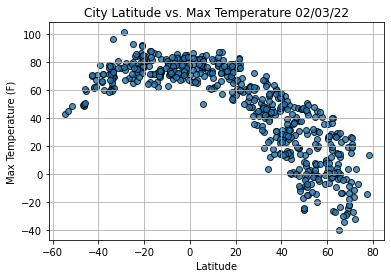

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

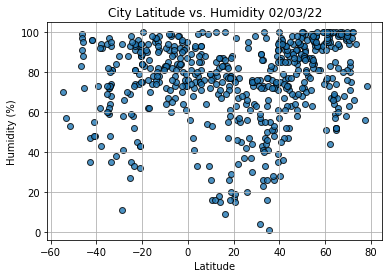

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

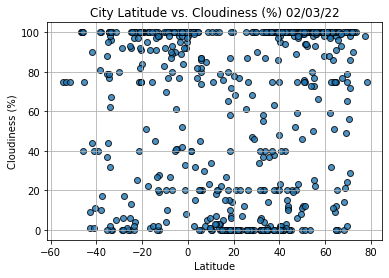

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

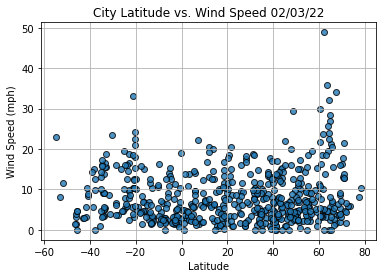

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

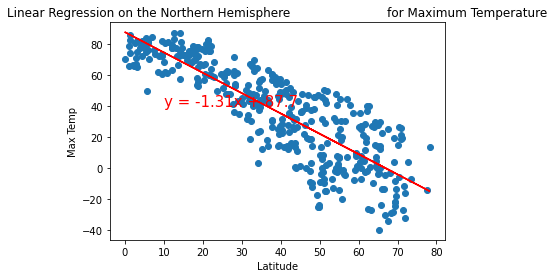

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

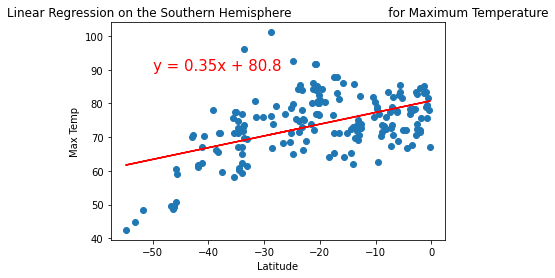

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

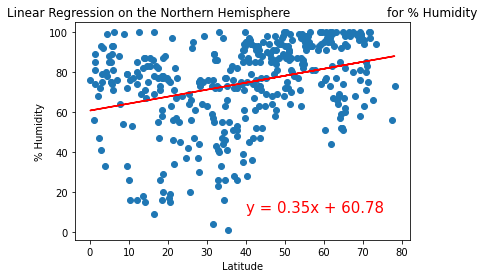

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

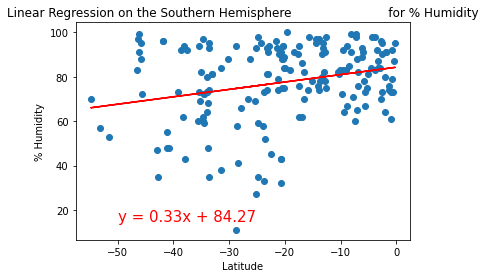

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

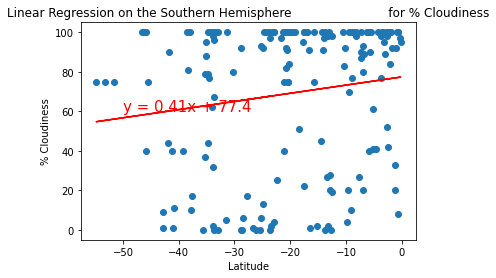

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

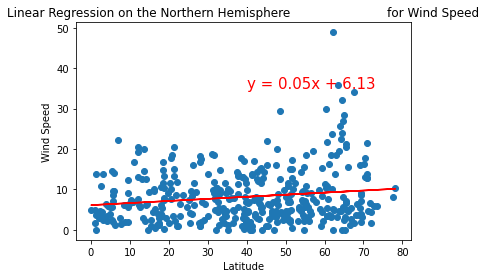

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

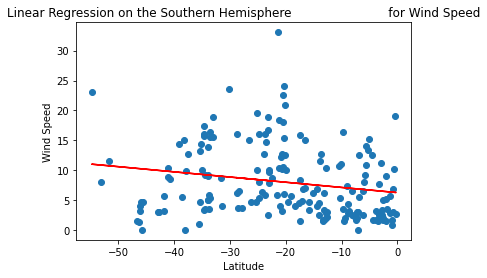

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))